In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
xgb_data = pd.read_csv('./drive/MyDrive/ML_in_Fin_Lab/result/XGBoost_Performance.csv')
gb_data = pd.read_csv('./drive/MyDrive/ML_in_Fin_Lab/result/GB_Performance.csv')
nn_data = pd.read_csv('./drive/MyDrive/ML_in_Fin_Lab/result/NN_Performance.csv')

xgb_data['Testing_RMSE'] = np.sqrt(xgb_data['Testing_MSE'])

xgb_data['Trade_Off_Metric'] = (1 / (xgb_data['Testing_RMSE']*xgb_data['Test_Time']))
gb_data['Trade_Off_Metric'] = (1 / (gb_data['Testing_RMSE']*gb_data['Test_Time']))
nn_data['Trade_Off_Metric'] = (1 / (nn_data['Testing_RMSE']*nn_data['Test_Time']))

In [ ]:
gb_data

,Sample_Size,Test_Time,Testing_RMSE,Trade_Off_Metric
0,2000,0.009012,1.303191,85.147426
1,50000,0.189089,0.509637,10.377044
2,250000,1.162686,0.403380,2.132176


Comparing all models across different sample sizes

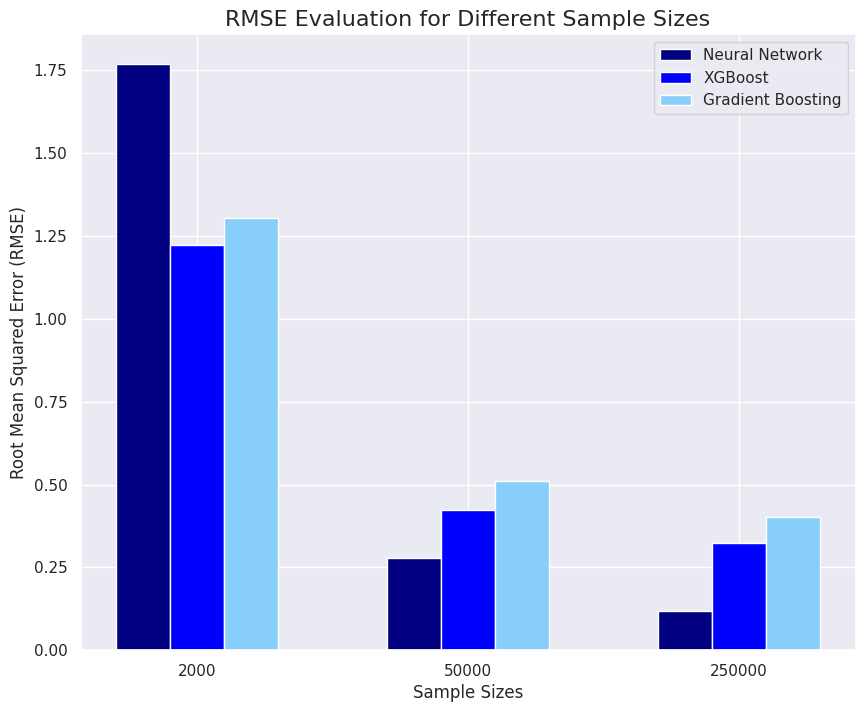

In [ ]:
# Comparing RMSE across different sample sizes

sns.set()

rmse_xgb = xgb_data.Testing_RMSE.values.tolist()
rmse_gb = gb_data.Testing_RMSE.values.tolist()
rmse_nn = nn_data.Testing_RMSE.values.tolist()

labels = ['2000', '50000', '250000']

x = range(len(labels))

# Creating the figure and axes objects
fig, ax = plt.subplots(figsize=(10, 8))


# Plotting the grouped bar plot
bar1 = ax.bar(x, rmse_nn, width=0.2, color='navy', label='Neural Network')
bar2 = ax.bar([i + 0.2 for i in x], rmse_xgb, width=0.2, color='blue', label='XGBoost')
bar3 = ax.bar([i + 0.4 for i in x], rmse_gb, width=0.2, color='lightskyblue', label='Gradient Boosting')

# bar2 = ax.bar(([i + 0.2 for i in x]), timings, width=0.3, color = 'b' , label = 'Testing Time')

# Setting labels and title
ax.set_xlabel('Sample Sizes')
ax.set_ylabel('Root Mean Squared Error (RMSE)')
ax.set_title('RMSE Evaluation for Different Sample Sizes', fontsize=16)

# Adjusting x-axis ticks and labels
ax.set_xticks([i + 0.2 for i in x])
ax.set_xticklabels(labels)

# Adding legend
ax.legend()

plt.show()

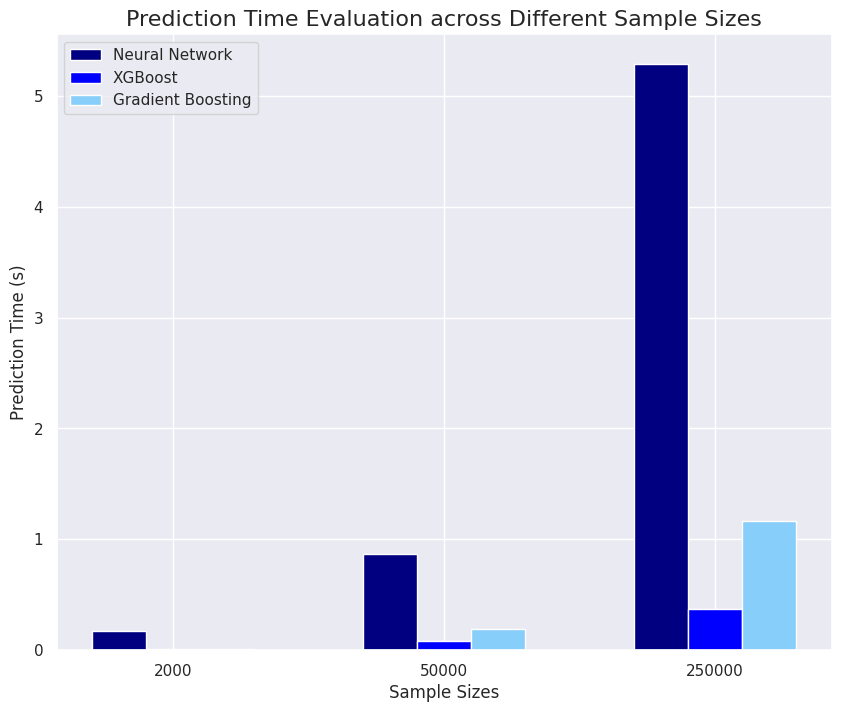

In [ ]:
# Comparing Prediction Time across different sample sizes

sns.set()

pt_xgb = xgb_data.Test_Time.values.tolist()
pt_gb = gb_data.Test_Time.values.tolist()
pt_nn = nn_data.Test_Time.values.tolist()

labels = ['2000', '50000', '250000']

x = range(len(labels))

# Creating the figure and axes objects
fig, ax = plt.subplots(figsize=(10, 8))


# Plotting the grouped bar plot
bar1 = ax.bar(x, pt_nn, width=0.2, color='navy', label='Neural Network')
bar2 = ax.bar([i + 0.2 for i in x], pt_xgb, width=0.2, color='blue', label='XGBoost')
bar3 = ax.bar([i + 0.4 for i in x], pt_gb, width=0.2, color='lightskyblue', label='Gradient Boosting')

# bar2 = ax.bar(([i + 0.2 for i in x]), timings, width=0.3, color = 'b' , label = 'Testing Time')

# Setting labels and title
ax.set_xlabel('Sample Sizes')
ax.set_ylabel('Prediction Time (s)')
ax.set_title('Prediction Time Evaluation across Different Sample Sizes', fontsize=16)

# Adjusting x-axis ticks and labels
ax.set_xticks([i + 0.2 for i in x])
ax.set_xticklabels(labels)

# Adding legend
ax.legend()

plt.show()

Comparing the three models for every sample size

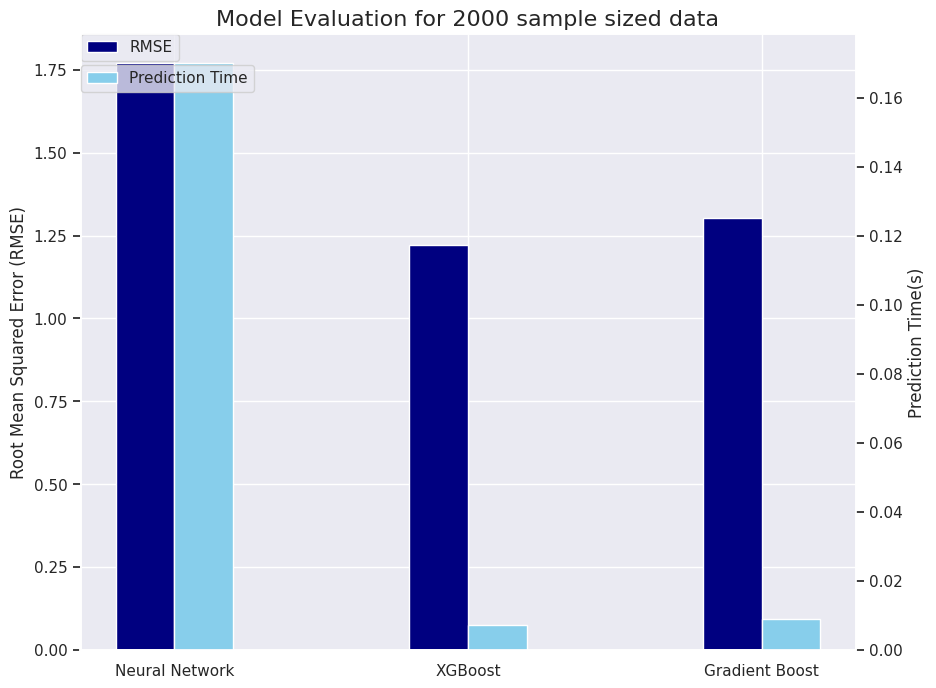

In [ ]:
# Sample Size = 2000

sns.set()

sample_size = 2000

xgb_ = (xgb_data[xgb_data.Sample_Size == sample_size]).Testing_RMSE.iloc[0]
nn_ = (nn_data[nn_data.Sample_Size == sample_size]).Testing_RMSE.iloc[0]
gb_ = (gb_data[gb_data.Sample_Size == sample_size]).Testing_RMSE.iloc[0]

t_xgb = (xgb_data[xgb_data.Sample_Size == sample_size]).Test_Time.iloc[0]
t_nn = (nn_data[nn_data.Sample_Size == sample_size]).Test_Time.iloc[0]
t_gb = (gb_data[gb_data.Sample_Size == sample_size]).Test_Time.iloc[0]

rmse_ = [nn_,xgb_,gb_]
tt_ = [t_nn, t_xgb, t_gb]

labels = ['Neural Network', 'XGBoost', 'Gradient Boost']

x = range(len(labels))

# Creating the figure and axes objects
fig, ax = plt.subplots(figsize=(10, 8))


# Plotting the grouped bar plot
bar1 = ax.bar(x, rmse_, width=0.2, color='navy', label='RMSE')

ax2 = ax.twinx()

bar2 = ax2.bar([i + 0.2 for i in x], tt_, width=0.2, color='skyblue', label='Prediction Time')

# bar2 = ax.bar(([i + 0.2 for i in x]), timings, width=0.3, color = 'b' , label = 'Testing Time')

# Setting labels and title
# ax.set_xlabel('Sample Sizes')
ax.set_ylabel('Root Mean Squared Error (RMSE)')
ax2.set_ylabel('Prediction Time(s)')
ax.set_title('Model Evaluation for {} sample sized data'.format(sample_size), fontsize=16)

# Adjusting x-axis ticks and labels
ax.set_xticks([i+0.1 for i in x])
ax.set_xticklabels(labels)

# Adding legend
ax.legend(loc='upper left', bbox_to_anchor=(0, 1), borderaxespad=0.)
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.95), borderaxespad=0.)

# Remove grid lines
# ax.grid(False)
ax2.grid(False)


plt.show()

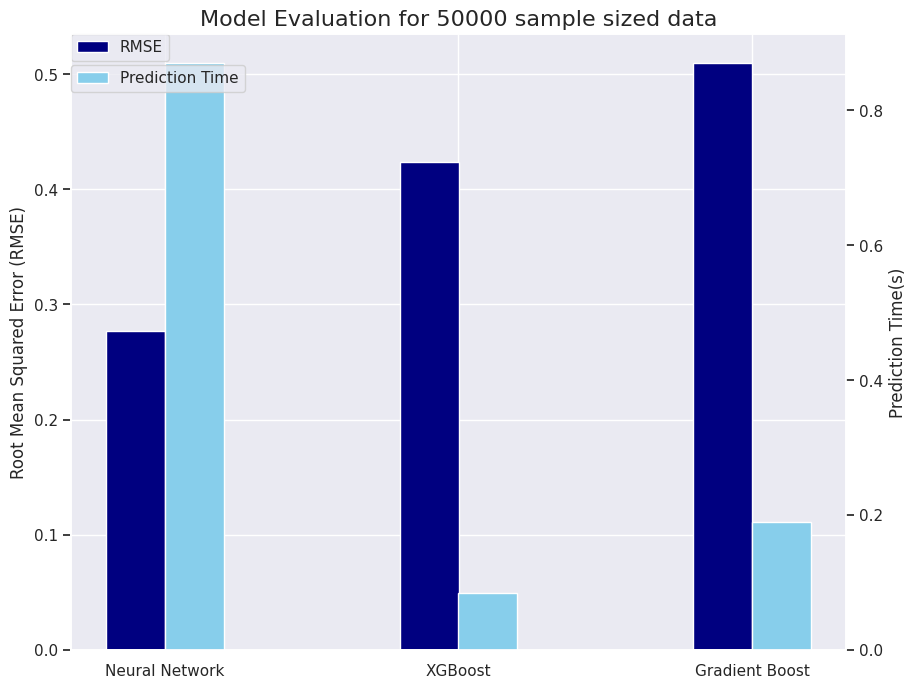

In [ ]:
# Sample Size = 50000

sns.set()

sample_size = 50000

xgb_ = (xgb_data[xgb_data.Sample_Size == sample_size]).Testing_RMSE.iloc[0]
nn_ = (nn_data[nn_data.Sample_Size == sample_size]).Testing_RMSE.iloc[0]
gb_ = (gb_data[gb_data.Sample_Size == sample_size]).Testing_RMSE.iloc[0]

t_xgb = (xgb_data[xgb_data.Sample_Size == sample_size]).Test_Time.iloc[0]
t_nn = (nn_data[nn_data.Sample_Size == sample_size]).Test_Time.iloc[0]
t_gb = (gb_data[gb_data.Sample_Size == sample_size]).Test_Time.iloc[0]

rmse_ = [nn_,xgb_,gb_]
tt_ = [t_nn, t_xgb, t_gb]

labels = ['Neural Network', 'XGBoost', 'Gradient Boost']

x = range(len(labels))

# Creating the figure and axes objects
fig, ax = plt.subplots(figsize=(10, 8))


# Plotting the grouped bar plot
bar1 = ax.bar(x, rmse_, width=0.2, color='navy', label='RMSE')

ax2 = ax.twinx()

bar2 = ax2.bar([i + 0.2 for i in x], tt_, width=0.2, color='skyblue', label='Prediction Time')

# bar2 = ax.bar(([i + 0.2 for i in x]), timings, width=0.3, color = 'b' , label = 'Testing Time')

# Setting labels and title
# ax.set_xlabel('Sample Sizes')
ax.set_ylabel('Root Mean Squared Error (RMSE)')
ax2.set_ylabel('Prediction Time(s)')
ax.set_title('Model Evaluation for {} sample sized data'.format(sample_size), fontsize=16)

# Adjusting x-axis ticks and labels
ax.set_xticks([i+0.1 for i in x])
ax.set_xticklabels(labels)

# Adding legend
ax.legend(loc='upper left', bbox_to_anchor=(0, 1), borderaxespad=0.)
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.95), borderaxespad=0.)

# Remove grid lines
# ax.grid(False)
ax2.grid(False)


plt.show()

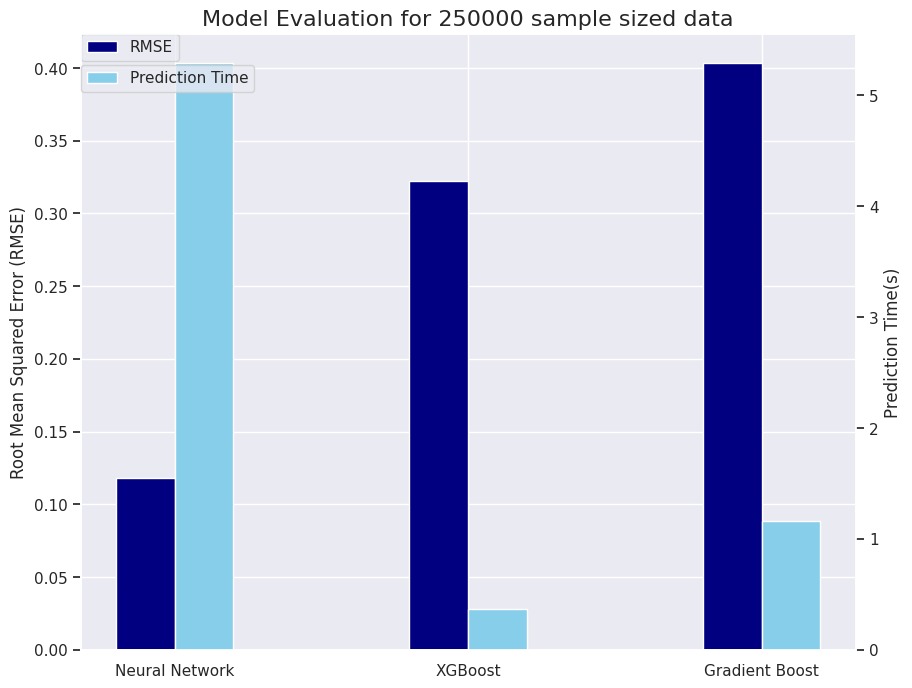

In [ ]:
# Sample Size = 250000

sns.set()

sample_size = 250000

xgb_ = (xgb_data[xgb_data.Sample_Size == sample_size]).Testing_RMSE.iloc[0]
nn_ = (nn_data[nn_data.Sample_Size == sample_size]).Testing_RMSE.iloc[0]
gb_ = (gb_data[gb_data.Sample_Size == sample_size]).Testing_RMSE.iloc[0]

t_xgb = (xgb_data[xgb_data.Sample_Size == sample_size]).Test_Time.iloc[0]
t_nn = (nn_data[nn_data.Sample_Size == sample_size]).Test_Time.iloc[0]
t_gb = (gb_data[gb_data.Sample_Size == sample_size]).Test_Time.iloc[0]

rmse_ = [nn_,xgb_,gb_]
tt_ = [t_nn, t_xgb, t_gb]

labels = ['Neural Network', 'XGBoost', 'Gradient Boost']

x = range(len(labels))

# Creating the figure and axes objects
fig, ax = plt.subplots(figsize=(10, 8))


# Plotting the grouped bar plot
bar1 = ax.bar(x, rmse_, width=0.2, color='navy', label='RMSE')

ax2 = ax.twinx()

bar2 = ax2.bar([i + 0.2 for i in x], tt_, width=0.2, color='skyblue', label='Prediction Time')

# bar2 = ax.bar(([i + 0.2 for i in x]), timings, width=0.3, color = 'b' , label = 'Testing Time')

# Setting labels and title
# ax.set_xlabel('Sample Sizes')
ax.set_ylabel('Root Mean Squared Error (RMSE)')
ax2.set_ylabel('Prediction Time(s)')
ax.set_title('Model Evaluation for {} sample sized data'.format(sample_size), fontsize=16)

# Adjusting x-axis ticks and labels
ax.set_xticks([i+0.1 for i in x])
ax.set_xticklabels(labels)

# Adding legend
ax.legend(loc='upper left', bbox_to_anchor=(0, 1), borderaxespad=0.)
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.95), borderaxespad=0.)

# Remove grid lines
# ax.grid(False)
ax2.grid(False)

plt.show()